In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
#plt.style.use('fivethirtyeight')

In [2]:
%matplotlib inline
from pylab import rcParams
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
import math
from sklearn.metrics import mean_squared_error
from random import random
import datetime


In [3]:
# Define the path to your Excel file
excel_path = "D:/AAU/Module_4/Project_mo_4/pune_tomato_market.xlsx"

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_path)

In [4]:
df.shape

(5017, 3)

In [5]:
# df.set_index('Price_Date', inplace=True)
# df.head(1)

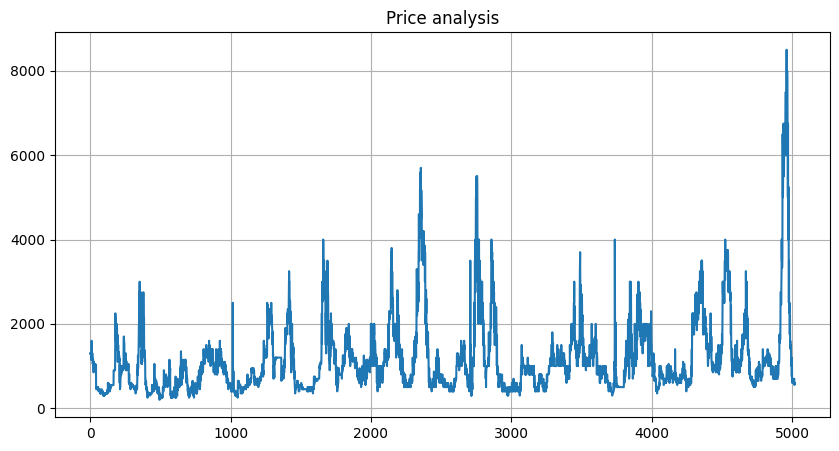

In [6]:
# Visualize
plt.figure(figsize=(10, 5))
plt.plot(df['Price'])
plt.title('Price analysis')
plt.grid(True)
plt.show();

In [7]:
df.describe(include ='all')

,Date,Arrival,Price
count,5017,5017.000000,5017.000000
mean,2016-11-15 00:00:00,161.125914,1161.181977
min,2010-01-03 00:00:00,0.100000,200.000000
25%,2013-06-10 00:00:00,111.000000,600.000000
50%,2016-11-15 00:00:00,147.700000,950.000000
75%,2020-04-22 00:00:00,194.000000,1350.000000
max,2023-09-28 00:00:00,2075.000000,8500.000000
std,NaN,97.563156,896.345939


In [8]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Price'])

In [9]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller
test_result1=adfuller(df['Price'].diff().dropna())
test_result1

(-12.073765765571434,
 2.315437653896153e-22,
 28,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 68588.61597139365)

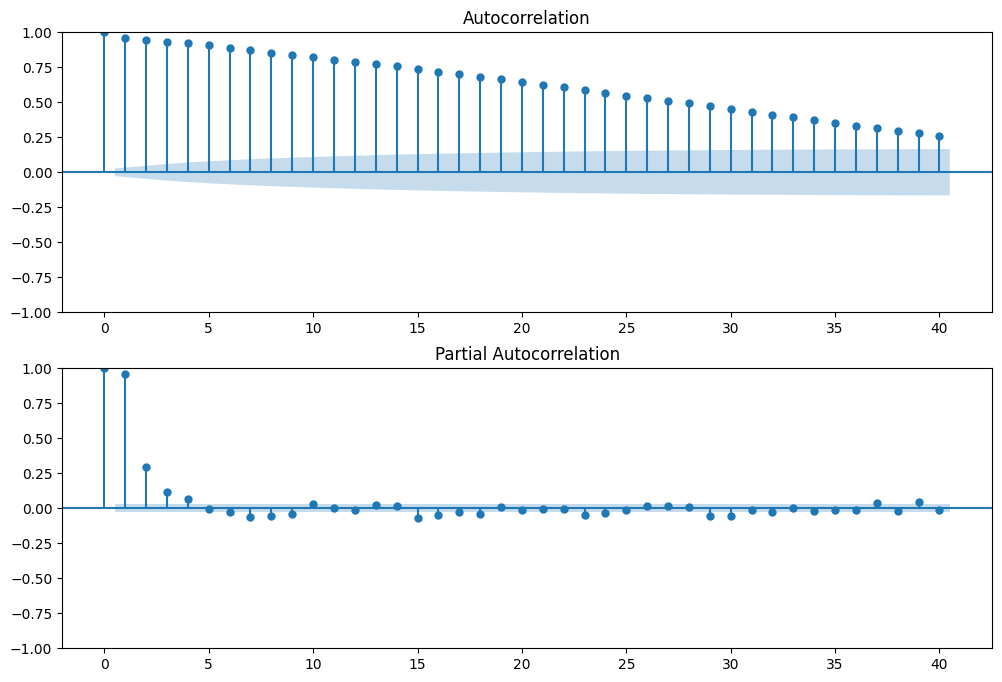

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Price'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Price'], lags=40, ax=ax2)
plt.show()

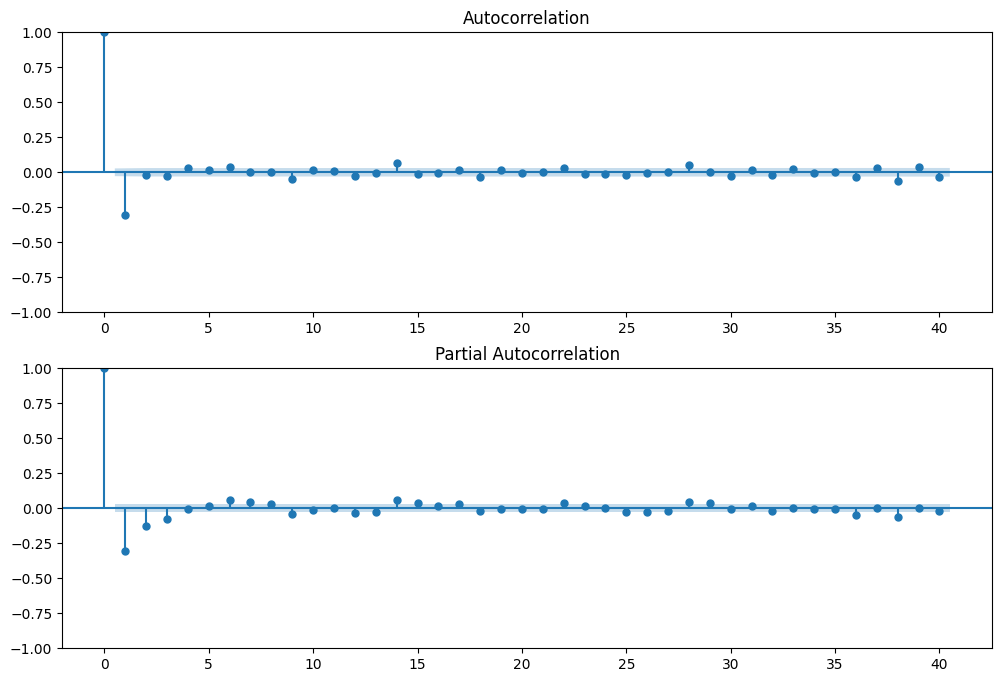

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#Plots with first order differenced Sales variable
fig = sm.graphics.tsa.plot_acf(df['Price'].diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Price'].diff().dropna(), lags=40, ax=ax2)
plt.show()

In [12]:
X = df['Price']
X = X.values
train, test = X[0:4017], X[4018:]

In [13]:
# %pip install pmdarima --quiet

In [14]:
from pmdarima.arima import auto_arima

In [15]:
arima_model = auto_arima(train,exogenous=df['Arrival'],start_p=0, d=1, start_q=0,
max_p=3, max_d=3, max_q=3, start_P=0,
D=1, start_Q=0, max_P=3, max_D=3,
max_Q=3, m=1, seasonal=False,
error_action='warn',trace = True,
supress_warnings=True,stepwise = True,
random_state=20,n_fits = 50 ) 

# if seasonal=True than it is SARIMA model and seasonal=False than it is ARIMA model

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=55417.404, Time=0.44 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=54986.081, Time=0.86 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=54922.549, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=55415.405, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=54924.547, Time=1.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=54924.552, Time=1.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=54926.551, Time=1.61 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=54920.550, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=54922.548, Time=0.44 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=54922.553, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=54984.082, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=54924.552, Time=0.87 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 8.194 seconds


In [16]:
#Summary of the model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4017
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -27458.275
Date:                Fri, 29 Nov 2024   AIC                          54920.550
Time:                        21:33:03   BIC                          54933.146
Sample:                             0   HQIC                         54925.014
                               - 4017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3626      0.006    -56.265      0.000      -0.375      -0.350
sigma2      5.087e+04    335.069    151.825      0.000    5.02e+04    5.15e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             75330.82
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               3.03   Skew:                             1.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

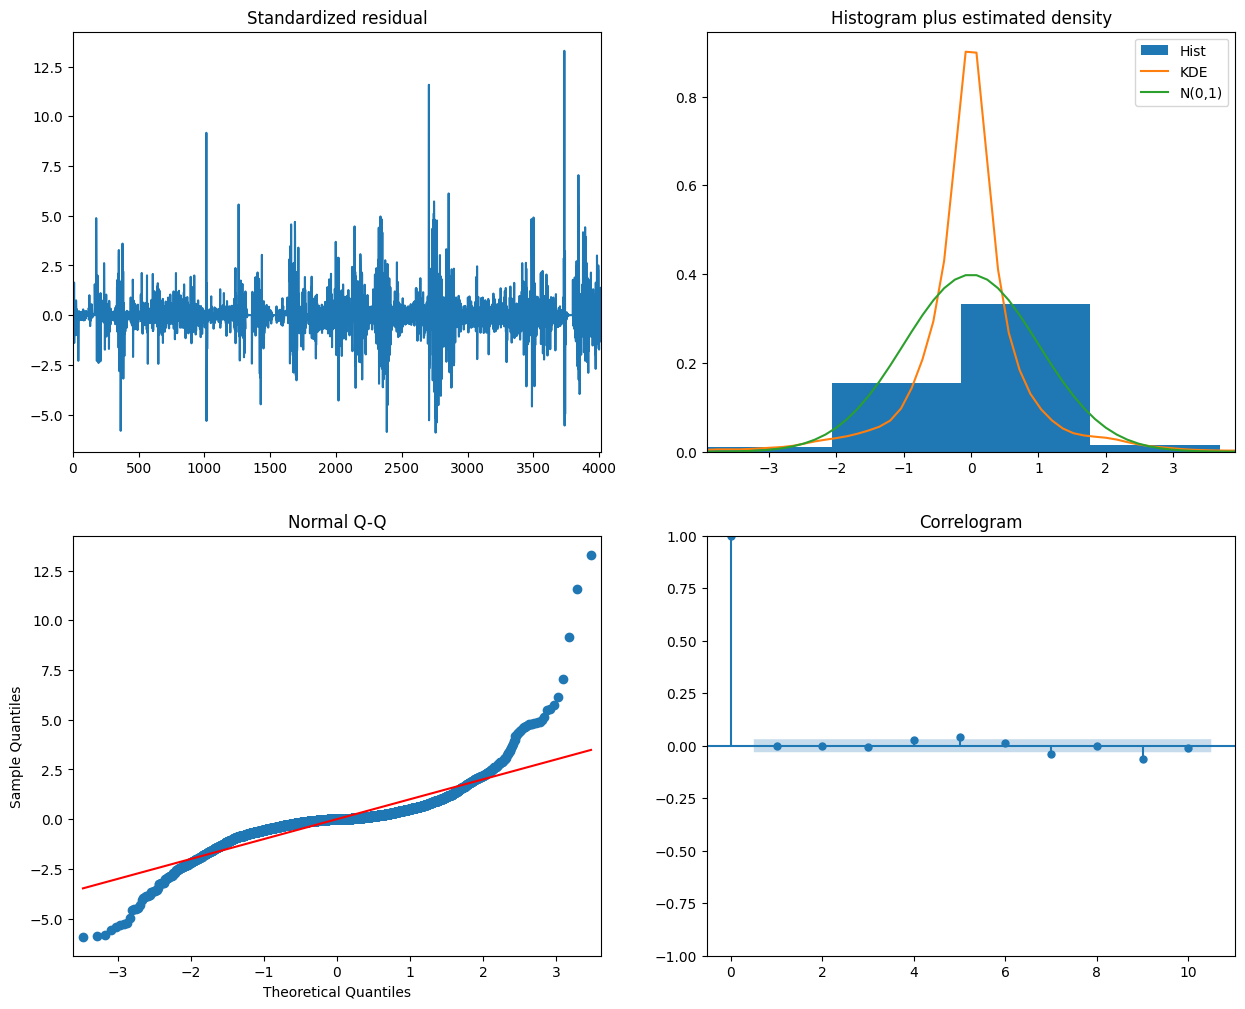

In [17]:
arima_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [18]:
# def forecast(ARIMA_model, periods=60):
#     # Forecast
#     n_periods = periods
#     fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
#     #pred = ARIMA_model.predict(n_periods=len(df["#y"]),dynamic=True)
#     index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(days=1), periods = n_periods, freq='D')

#     # make series for plotting purpose
#     fitted_series = pd.Series(fitted, index=index_of_fc)
#     lower_series = pd.Series(confint[:, 0], index=index_of_fc)
#     upper_series = pd.Series(confint[:, 1], index=index_of_fc)

#     # Plot
#     plt.figure(figsize=(15,7))
#     plt.plot(df["Price"], color='#1f76b4')
#     #plt.plot(pred, color='yellow')
#     plt.plot(fitted_series, color='darkgreen')
#     plt.fill_between(lower_series.index,
#     lower_series,
#     upper_series,
#     color='k', alpha=.15)

#     plt.title("ARIMA/SARIMA - Forecast")
#     plt.show()
    
# forecast(arima_model)

In [19]:
X = df['Price']
X = X.values
train_data_new = X[:4017]
test_data_new = X[4018:]

In [20]:
train_data_new = pd.DataFrame({'Date': df['Date'][:4017], 'Price': train_data_new})
test_data_new = pd.DataFrame({'Date': df['Date'][4018:], 'Price': test_data_new})

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

In [22]:
from datetime import timedelta

In [23]:
from pmdarima.arima import auto_arima

In [24]:
# Make predictions on the training data
train_predictions_new, _ = arima_model.predict_in_sample(return_conf_int=True)

# Store the training predictions with dates
train_predictions_df_new = pd.DataFrame({'Date': train_data_new['Date'], 'Predicted_Price': train_predictions_new})
train_predictions_df_new.set_index('Date', inplace=True)

# Make predictions on the test data
test_predictions_new, conf_int =arima_model.predict(n_periods=len(test_data_new), return_conf_int=True)

# Store the test predictions with dates
test_predictions_df_new = pd.DataFrame({'Date': test_data_new['Date'], 'Predicted_Price': test_predictions_new})
test_predictions_df_new.set_index('Date', inplace=True)

# Forecast 10 steps ahead
forecast_steps = 100
forecast_new, conf_int_forecast =arima_model.predict(n_periods=forecast_steps, return_conf_int=True)

# Create a DataFrame for the forecasted values with future dates
future_dates = pd.date_range(df['Date'].max() + timedelta(days=1), periods=forecast_steps, freq='D')
forecast_df_new = pd.DataFrame({'Date': future_dates, 'Forecasted_Price': forecast_new})
forecast_df_new.set_index('Date', inplace=True)

In [25]:
train_data_new['Date'] = pd.to_datetime(train_data_new['Date'])
test_data_new['Date'] = pd.to_datetime(test_data_new['Date'])
train_predictions_df_new.index = pd.to_datetime(train_predictions_df_new.index)
test_predictions_df_new.index = pd.to_datetime(test_predictions_df_new.index)
forecast_df_new.index = pd.to_datetime(forecast_df_new.index)

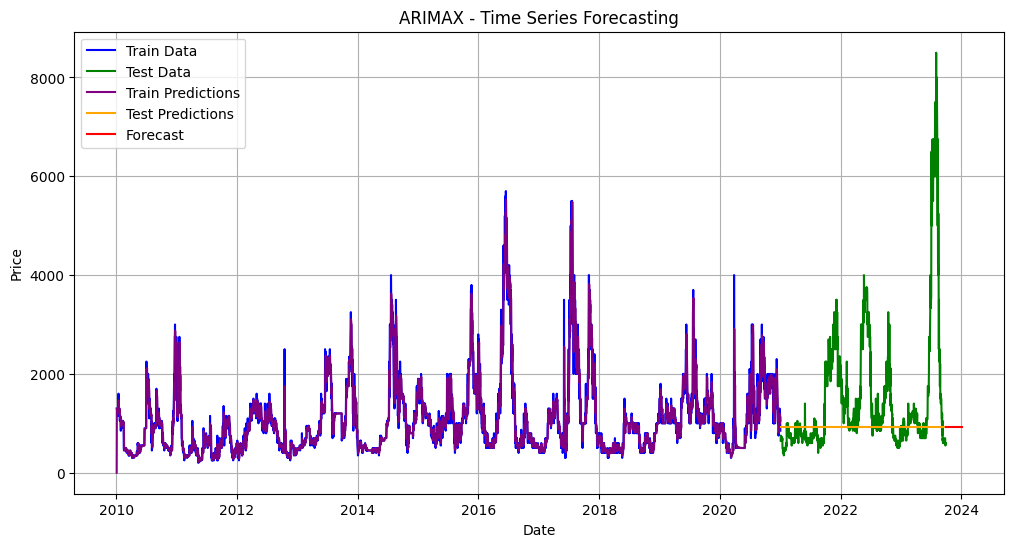

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_new['Date'], train_data_new['Price'], label='Train Data', color='blue')
plt.plot(test_data_new['Date'], test_data_new['Price'], label='Test Data', color='green')
plt.plot(train_predictions_df_new.index, train_predictions_df_new['Predicted_Price'], label='Train Predictions', color='purple')
plt.plot(test_predictions_df_new.index, test_predictions_df_new['Predicted_Price'], label='Test Predictions', color='orange')
plt.plot(forecast_df_new.index, forecast_df_new['Forecasted_Price'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('ARIMAX - Time Series Forecasting')
plt.grid(True)
plt.show()

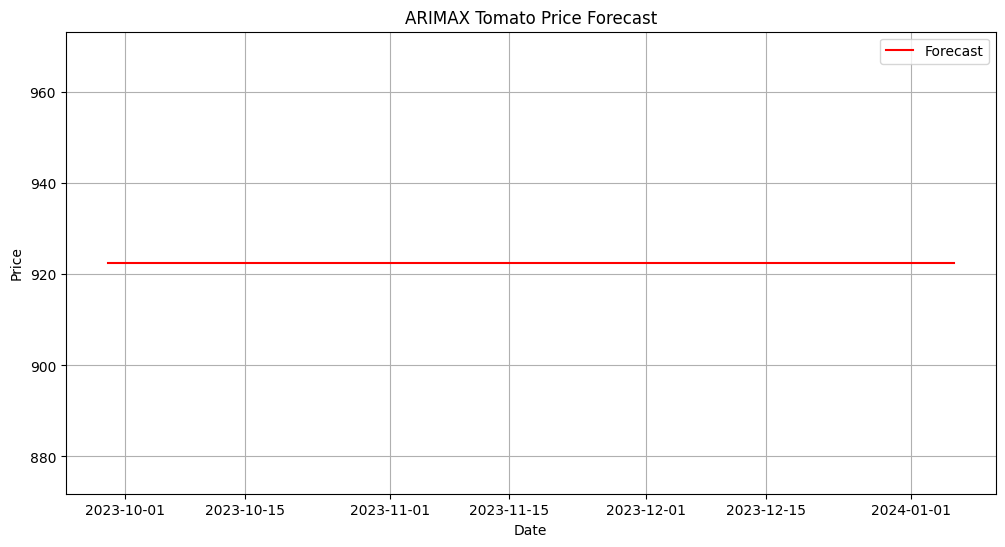

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_df_new.index, forecast_df_new['Forecasted_Price'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('ARIMAX Tomato Price Forecast')
plt.grid(True)
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error
y_true = test_data_new["Price"]
y_pred = test_predictions_df_new

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Calculate the range of the target variable
y_range = np.max(y_true) - np.min(y_true)

# Calculate the RMSE as a percentage of the range
rmse_percentage = (rmse / y_range) * 100

# Calculate NRMSE (normalized by mean of observed values)
nrmse = rmse / np.mean(y_true)
print(f'Normalized RMSE (NRMSE): {nrmse:.2f}')

print(f'Root Mean Squared Error (MSE) : {mse:.2f}')
print(f'Root Mean Squared Error (RMSE) : {rmse:.2f}')
print(f'Root Mean Squared Error (RMSE) as a percentage of the range: {rmse_percentage:.2f}%')

Normalized RMSE (NRMSE): 0.94
Root Mean Squared Error (MSE) : 1991440.42
Root Mean Squared Error (RMSE) : 1411.18
Root Mean Squared Error (RMSE) as a percentage of the range: 17.32%
